# Problem session 5

We have seen how to implement the Gillespie algorithm.
However, writing down the update and propensity functions is tedious and error prone.
Let's use a tool that does this for us.

In this lecture we chose to go with [basico](https://basico.readthedocs.io/en/latest/index.html) - a slim and powerful simulation tool for reactions based on [Copasi](http://copasi.org).
Let's load some libraries first.

In [1]:
# -- install --
# uncomment if needed
#
# %pip install copasi-basico
# -- end install --

from basico import *

# numbers
import numpy as np
import scipy.stats as st
import numba

# plotting
import matplotlib.pyplot as plt
figsize = (5,4)

## Hello world: $A + B \rightarrow C$
Now let's create our first model and simulate it.
We are using [pandas](https://pandas.pydata.org/docs/) to plot the data, but could also transform it into a numpy/list to plot is with matplotlib.

We are using these units:
{'time_unit': 's', 'quantity_unit': '#', 'length_unit': 'm', 'area_unit': 'm²', 'volume_unit': 'ml'}

Initial counts are:
name
A    10.0
B    20.0
C     0.0
Name: initial_particle_number, dtype: float64

Results:
         A     B     C
Time                  
0.0   10.0  20.0   0.0
0.5    8.0  18.0   2.0
1.0    6.0  16.0   4.0
1.5    5.0  15.0   5.0
2.0    4.0  14.0   6.0
...    ...   ...   ...
48.0   0.0  10.0  10.0
48.5   0.0  10.0  10.0
49.0   0.0  10.0  10.0
49.5   0.0  10.0  10.0
50.0   0.0  10.0  10.0

[101 rows x 3 columns]


<Figure size 360x288 with 0 Axes>

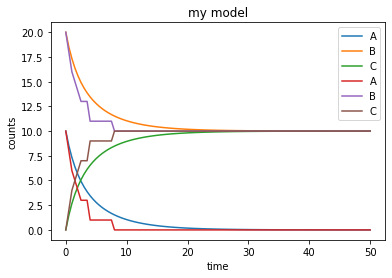

In [2]:
# create model
modelname = 'my model'
new_model(name=modelname)
set_model_unit(quantity_unit='#')
set_model_unit(volume_unit='ml')
add_reaction('R1', 'A + B -> C')
set_species('A', initial_concentration=10)
set_species('B', initial_concentration=20)
set_species('C', initial_concentration=0)
set_reaction_parameters('(R1).k1', value=1/60)

# show current setting
print('We are using these units:')
print(get_model_units())
print('\nInitial counts are:')
print(get_species().initial_particle_number)

# simulate
result_det = run_time_course(duration=50, method='deterministic', use_numbers=True, use_seed=False)
result_sto = run_time_course(duration=50, method='stochastic', use_numbers=True, use_seed=False)

# show results
print('\nResults:')
print(result_sto)

TO_PLOT = ['A', 'B', 'C']

# plot on top of each other
# we are using pandas plot here
fig = plt.figure(figsize=figsize)
ax = None
for res in [result_det, result_sto]:
    res_filtered = res.loc[:, TO_PLOT]
    if ax is None:
        ax = res_filtered.plot()
    else:
        res_filtered.plot(ax=ax)
    plt.title(modelname)
    plt.xlabel('time')
    plt.ylabel('counts')


### A word of warning

Be careful since `basico` calls by design have side effects. It may be that you created a model and later changed species names, but the model
still has the old species in it. If such things happen, restart the kernel.

### More reactions

Try to modify the code above: introduce more reactions and play around with plotting several stochastic traces.
Once you are comfortable with running simulations, you are ready for your first dsitributed algorithm.


### Distributed oscillation among bacteria

Check out the next homework.
It is based on a paper that proposes an algorithm that leads to oscillation of bacterial concentrations.
The design makes use of communication among the bacteria via a small diffusible signaling molecule AHL.

We propose to start reading the homework assignment with the following questions in mind:
* What are the species that you would like to track to model the observed behavior.
  In particular, think about what is your volume that you want to track over time.
  Or do you need to distinguish between several compartments?
* Next think of the reactions.
  Which reactions are important? And what is their kinetics?
  Can you come up with estimates for kinetics parameters (based on the paper or other sources, ...)?
  State all your sources and explain choices.
* Are you going to use ODEs or stochastic simulations?
  Are you cwriting customn simulation code for it, or using the lecture's SSA algorithm, or will you use basico?
  Tell us why.